# Predicting Clicks on Ad

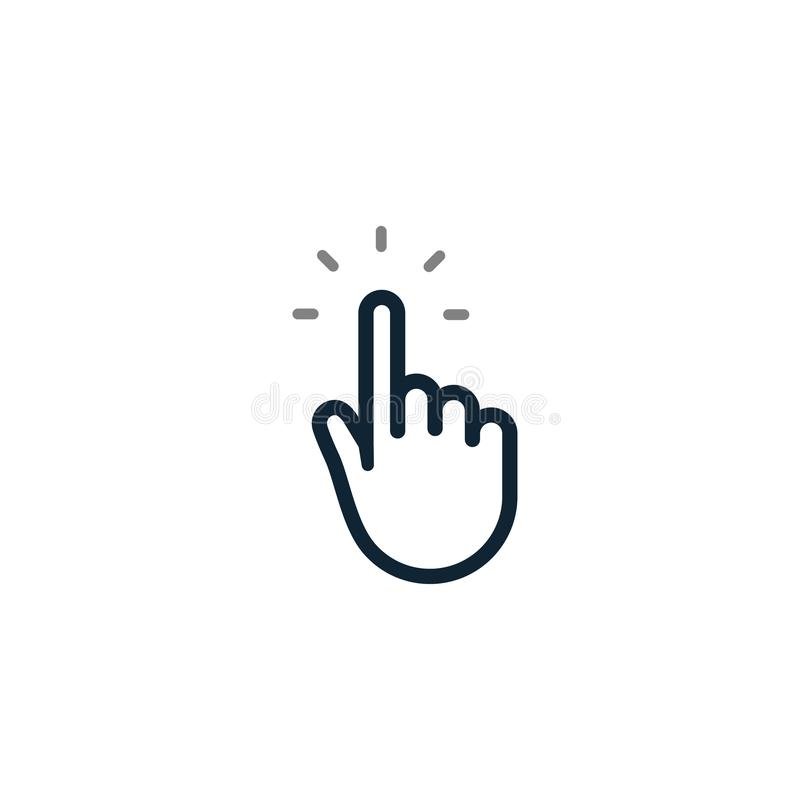

## Introduction
---
Prediction of Clicks on Ad is a important business problem because click is a way to induces the clients to buy. Be able to predict and estimate the probability of a new user to click in Ad can be a powerfull tool.

This task is possible and low cost using Machine Learning with a simple model. This is a **supervised - classification** problem.

## Methodology
As methodology, I will use the **CRISP-DM** because this is a modern and efficiente model used in the industry and entreprise.

The **C**ross **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (**CRISP-DM**) is a process model with six phases that naturally describes the data science life cycle. It’s like a set of guardrails to help you plan, organize, and implement your data science (or machine learning) project.

**Business understanding** – What does the business need?

**Data understanding** – What data do we have / need? Is it clean?

**Data preparation** – How do we organize the data for modeling?

**Modeling** – What modeling techniques should we apply?

**Evaluation** – Which model best meets the business objectives?

**Deployment** – How do stakeholders access the results?

Our Mind map based on **CRISP-DM** methodology:

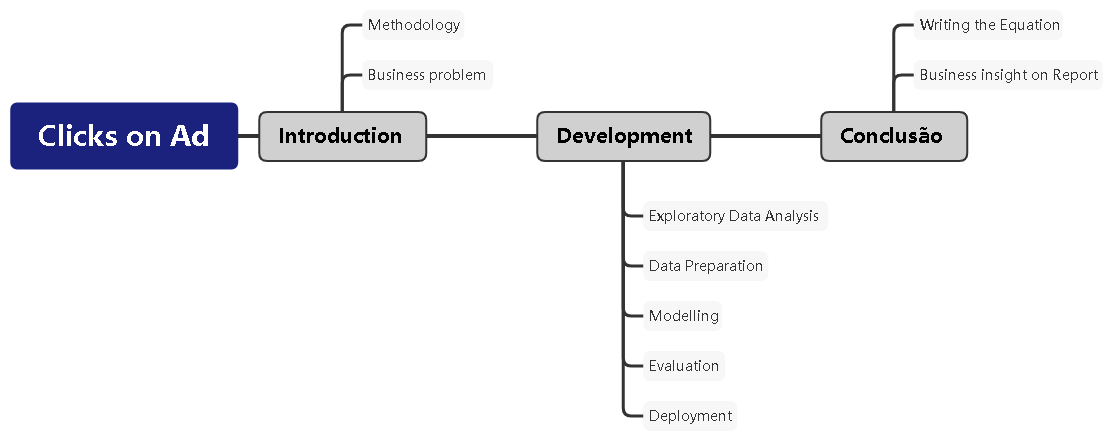

## Business understand (fiction)
Mr. Jhon, CEO of a social network, and hired you to applied a Machine Learning algorithm to predict if an users will go to click or not in the Ad that show in their feed

The business strategy is a massive investment in Ads by social network and their investors. Get predict the probability of click in an Ad will go help the decision makers choose the best decisions.

In this notebook, I will develope the detailed data analysis and modelling. The report to Mr. Jhon will be created in the final cell. The business analysis is in the Report

In [ ]:
!pip install fpdf
!pip install plotly
import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from fpdf import FPDF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=f02df859af8b2a80f50520d0cd1603fc813c78e38a18e33626b2d9b1265495a5
  Stored in directory: /root/.cache/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Patotricks15/Datasets/main/Datasets/advertising.csv')

Visualizing our dataset...

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


And visualizing the informations about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Now that we already read and understand the dataset. We will plot some charts

## Data understanding - Exploratory Data Analysis

An important process to model building and the problem solving is the EDA. From it we can meet, in a better way, our dataset and their distributions, and get insights about the modelling and feature choose.

In our EDA we will split our data according our target variable (Clicked on Ad)

### Univariated Analysis

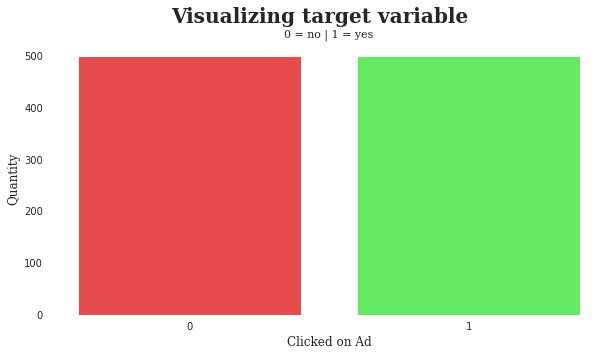

In [ ]:
cores_clicked = ['#ff3333', '#4dff4d']
paleta_clicked = sns.color_palette(cores_clicked)
plt.figure(figsize=(10,5))
sns.countplot(df['Clicked on Ad'], palette=paleta_clicked)
plt.suptitle('Visualizing target variable\n', fontsize=20, fontfamily='serif', fontweight='bold')
plt.title('0 = no | 1 = yes',fontsize=11, fontfamily='serif')
plt.ylabel('Quantity',fontsize=12, fontfamily='serif')
plt.xlabel('Clicked on Ad', fontsize=12, fontfamily='serif')
plt.box(False)

Spliting by gender

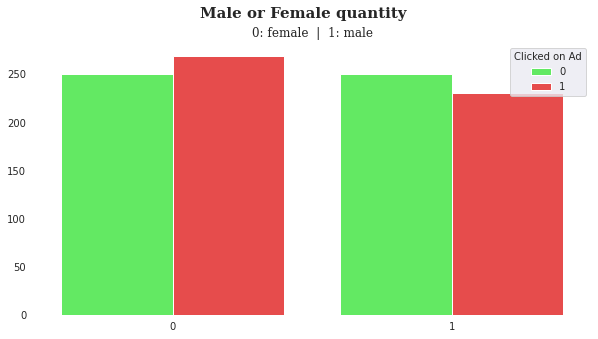

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Male or Female quantity\n', fontsize=15, fontfamily='serif', fontweight='bold')
plt.title('0: female  |  1: male', fontfamily='serif')
sns.countplot(df['Male'], palette=['#4dff4d', '#ff3333'], hue=df['Clicked on Ad'])
plt.box(False)
plt.ylabel('')
plt.xlabel('');

Ploting the Clicked on Ad Decision by all variables

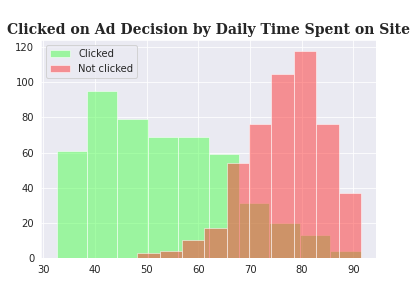

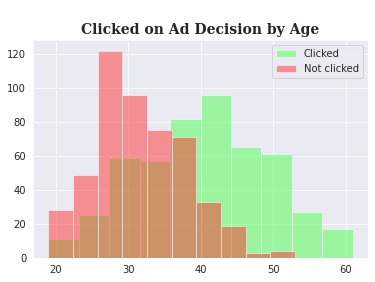

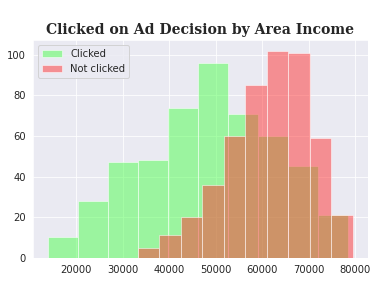

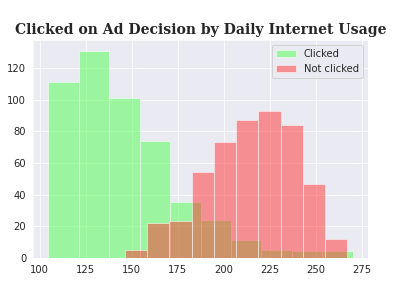

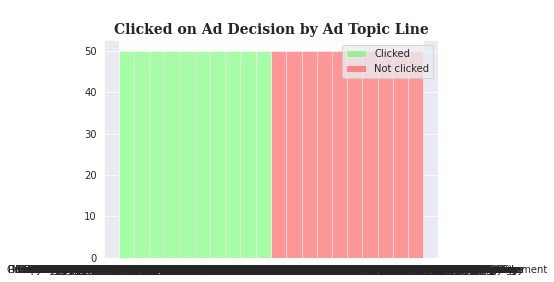

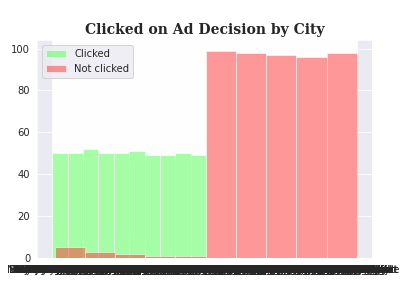

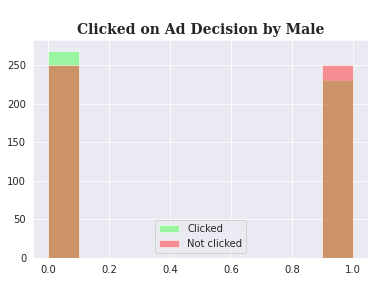

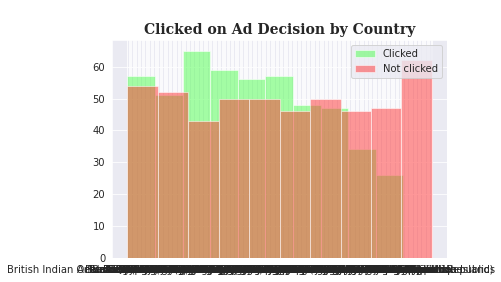

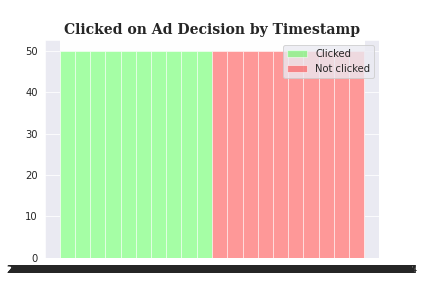

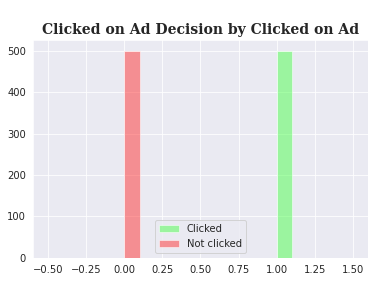

In [ ]:
for i in df.columns:
  df[(df['Clicked on Ad'] == 1)][i].hist(alpha=0.5, label='Clicked', color = '#4dff4d')
  df[(df['Clicked on Ad'] == 0)][i].hist(alpha=0.5, label='Not clicked', color = '#ff3333')
  plt.title(f'\nClicked on Ad Decision by {i}',fontsize=14, fontfamily = 'serif', fontweight = 'bold')
  plt.legend()
  plt.show();

As we can see, our data is split in "Clicked" or "Not Clicked". In some features, this split is more simple to see. So, we choose the features to train our model, because the model will fit better and the result will more interpretable. It's good to decision make and business

We can understand that the variables where are better divided are:

* Daily time spend on site
* Age
* Daily time spend on internet
* Area income

So, we choose this variables

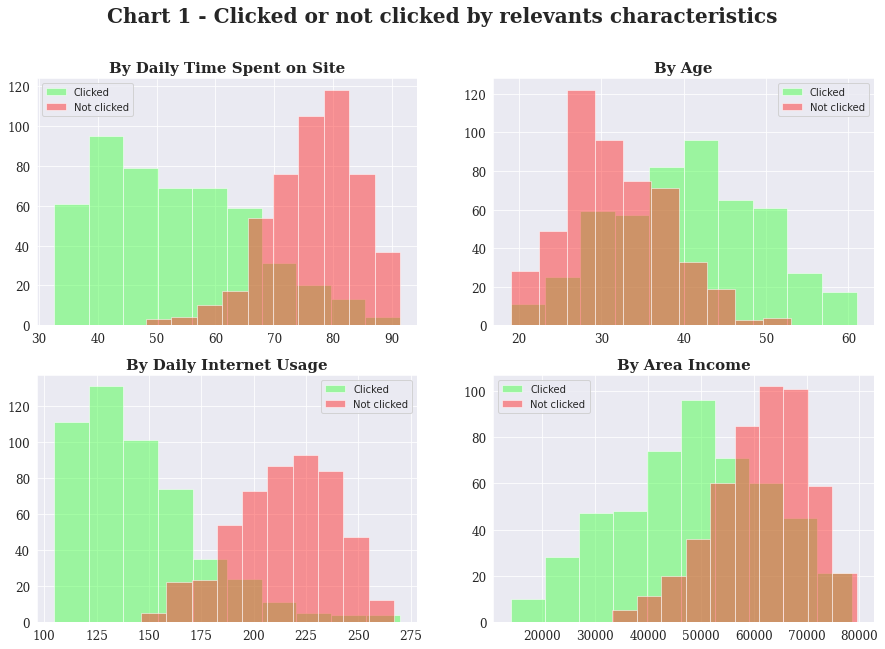

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('Chart 1 - Clicked or not clicked by relevants characteristics', fontfamily='serif', fontweight = 'bold', fontsize=20)
for num,i in enumerate(['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Area Income']):
  plt.subplot(2, 2, num+1)
  df[(df['Clicked on Ad'] == 1)][i].hist(alpha=0.5, label='Clicked', color = '#4dff4d')
  df[(df['Clicked on Ad'] == 0)][i].hist(alpha=0.5, label='Not clicked', color = '#ff3333')
  plt.title(f'By {i}', fontsize=15, fontweight = 'bold', fontfamily='serif')
  plt.xticks(fontsize=12, fontfamily='serif')
  plt.yticks(fontsize=12, fontfamily='serif')
  plt.legend()
  fig = plt.gcf();
fig.savefig('chart_1.png', format='png')

In [ ]:
df2 = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']]

### Bivariated Analysis

Now, we will analyse the split (clicked x not clicked) in relation about two variables. It show us how the variables are spliting the click decision

<Figure size 1080x720 with 0 Axes>

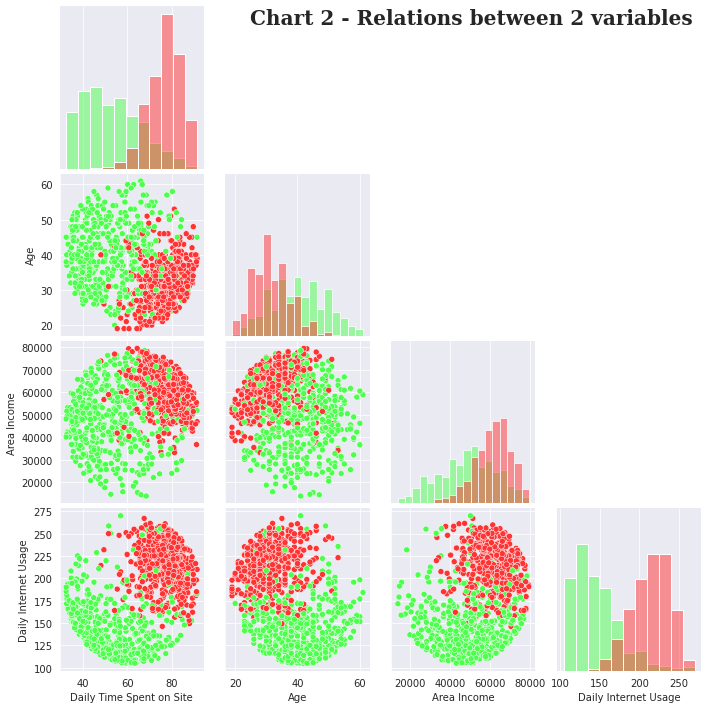

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
g = sns.pairplot(df2, hue='Clicked on Ad', palette=['#ff3333','#4dff4d'], corner=True, diag_kind='hist')
g.fig.suptitle('Chart 2 - Relations between 2 variables',x=0.6,fontsize=20, fontfamily='serif', fontweight='bold')
plt.xticks(fontfamily='serif', fontsize=18)
plt.yticks(fontfamily='serif', fontsize=18)
g._legend.remove()
fig = plt.gcf()
fig.savefig('chart_2.png', format='png')
#Salvar como pairplot.png

## Data preparation - Pre processing

First, we choose the 4 principal features to our model. This features will are the independent variables. The Clicked on Ad will are the dependent variable

In [ ]:
X = df2[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
Y = df2['Clicked on Ad']

The second step: split our dataset in train and test. Train to fit our model, and test to evaluate the model performance

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
703,77.65,28,66198.66,208.01
311,69.74,49,66524.80,243.37
722,39.47,43,65576.05,163.48
629,73.94,26,55411.06,236.15
0,68.95,35,61833.90,256.09
...,...,...,...,...
106,72.23,25,46557.92,241.03
270,44.49,53,63100.13,168.00
860,91.37,45,51920.49,182.65
435,56.66,42,72684.44,139.42


Our selected variables are differents scales. So, we could standart in may that our model can be able fit correctly.

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[ 0.79461073, -0.91611649,  0.85701971,  0.61391391],
       [ 0.29917387,  1.41602734,  0.88116665,  1.42254111],
       [-1.59676469,  0.74970054,  0.81092257, -0.40441668],
       ...,
       [ 1.65395256,  0.97180947, -0.20011537,  0.03397086],
       [-0.52008204,  0.63864607,  1.33721749, -0.95463078],
       [ 1.56250656,  0.41653713,  0.36798765,  0.29878713]])

In [ ]:
X_test

array([[-0.10669603, -0.80506202,  0.01214428, -1.38821596],
       [ 0.39249889,  1.74919075, -0.97005785, -1.33950623],
       [-1.33620623,  0.1944282 ,  0.52817451, -1.04999208],
       ...,
       [ 0.12003993, -0.13873521,  0.60471853, -1.41085569],
       [ 0.3129534 , -0.58295308,  1.39122344,  0.75226783],
       [ 0.67247396, -0.80506202,  0.96324875,  0.78382624]])

## Modelling and Evaluation

---
The Machine Learning model choosing depend essencially of the business problem to solving. Let's thinking...
A escolha de um modelo de machine learning depende essencialmente do problema a ser resolvido. Vamos pensar...

We want prdict a value class (clicked or not clicked). So, we have a classification problem

Our values are bynaries (clicked or not clicked), so a good model is the **Logistic Regression**


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predict = model.predict(X_test)
print(classification_report(Y_test, predict))
accuracy = accuracy_score(Y_test, predict)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       162
           1       0.98      0.95      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [ ]:
model.predict_proba([-0.52008204,  0.63864607,  1.33721749, -0.95463078])

ValueError: ignored

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(Y_test, predict), cmap='Blues', annot=True, fmt='.3g',
            linecolor='black',
            linewidths=1,
            square=True,
            annot_kws={'fontsize':30,'fontfamily':'serif'},
            yticklabels=['Not clicked','Clicked'],
            xticklabels=['Not clicked', 'Clicked'],
            cbar=False)
plt.xticks(fontfamily='serif',fontsize=15)
plt.yticks(fontfamily='serif',fontsize=15)
plt.xlabel('\nPredicted',fontfamily='serif',fontsize=18)
plt.ylabel('Real\n',fontfamily='serif',fontsize=18);
fig = plt.gcf()
fig.savefig('chart_3.png', format='png')

### Writing the Logistic Regression Equation

---

Write the equation of a model can have utility and facilitate to manthematical analysis

The equation is the follow:

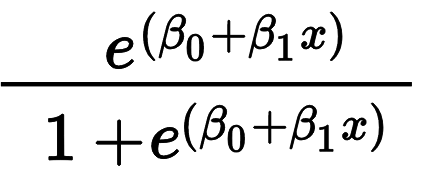

Model intercept

In [ ]:
model.intercept_

Model coefs

In [ ]:
model.coef_

In [ ]:
print(f'    e^({round(model.intercept_[0],2)} + {model.coef_[0][0]:.2f}x1 + {model.coef_[0][1]:.2f}x2 + {model.coef_[0][2]:.2f}x3 + {model.coef_[0][3]:.2f}x4)')
print('  _____________________________________________________')
print(f'    1 + e^({round(model.intercept_[0],2)} + {model.coef_[0][0]:.2f}x1 + {model.coef_[0][1]:.2f}x2 + {model.coef_[0][2]:.2f}x3 + {model.coef_[0][3]:.2f}x4)')

## Deployment - Business Report

In here, our script to write the report to Mr. Jhon

In [ ]:
df2.rename(columns={'Daily Time Spent on Site':'Daily Time on Site'}, inplace=True)
df3 = df2.sample(frac=1)
def render_mpl_table(data, col_width=5.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w',fontsize=14, fontfamily='serif')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df3.head(), header_columns=0, col_width=3, font_size=16)
fig.savefig("table.png")

Writing PDF

In [ ]:
class PDF(FPDF):
    def header(self):
        # Logo
       # self.image('logo_pb.png', 10, 8, 33)
        # Arial bold 15
        self.set_font('Times', 'B', 20)
        # Move to the right
        self.cell(80)
        # Title
        self.cell(30, 10, 'REPORT', 0, 1)
        self.cell(30, 10, '                                   Predicting Click on Ad', 0, 1)
        self.set_font('Times', 'I', 10)       
        self.cell(20, 5, 'Patrick Gomes de Oliveira',0,1) 
        # Line break
        self.ln(10)

    # Page footer
    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-15)
        # Arial italic 8
        self.set_font('Times', 'I', 8)
        # Page number
        self.cell(0, 10, 'Page ' + str(self.page_no()) + '/{nb}', 0, 0, 'C')

# Instantiation of inherited class
pdf = PDF()
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_font('Times', '', 12)
pdf.cell(0, 10, '       Hello, Mr. Jhon! This report is about the model build to predict Clicks on Ad at your startup.',0,1)
pdf.cell(0, 5, 'The model would receive data with the format below: ',0,1)
pdf.image('table.png',w=200, h=50)
pdf.cell(0, 10, '       The graphical analysis (in notebook) was able to show us how separated are the Clickeds given by their features.', 0,1)
pdf.cell(0, 5, 'With this, we can understand that the variables where the Clicks are better separated:',0,1)
for i in ['* Daily Time Spent on Site', '* Age', '* Daily Internet Usage', '* Area income']:
  pdf.cell(0, 8,f'       {i}',0,1)
pdf.image('chart_1.png',w=150, h=100)
pdf.set_font('Times', 'B', 15)
pdf.cell(0,10, '', 0,1)
pdf.cell(0, 10, 'Business insights given by univariate analysis:',0,1)
pdf.set_font('Times', '', 12)
pdf.cell(0, 10, '       * Daily Time Spent on Site: 30 ~ 70 minutes maximize your revenue;',0,1)
pdf.cell(0, 8, '        * Age: 35 ~ 60 years maximize your revenue;',0,1)
pdf.cell(0, 8, '        * Daily Internet Usage: 100 ~ 175 minutes maximize your revenue;',0,1)
pdf.cell(0, 8, '        * Area Income: $20 000 ~ $55 000 maximize your revenue;',0,1)
pdf.cell(0, 10, " With the univariate analysis we can realize how the Clicked are divided, It facilitates our analysis and model's",0,1)
pdf.cell(0, 5, 'interpretability.', 0,1)
pdf.set_font('Times', 'B', 15)
pdf.cell(0, 20, 'Bivariate analysis',0,1)
pdf.set_font('Times', '', 12)
pdf.cell(0, 5, '        Make an bivariate analysis show us a lot of valuous information about the problem and insights to model.', 0,1)
pdf.cell(0, 5, 'For this, we plot the chart below:',0,1)
pdf.cell(0,10, '', 0,1)
pdf.image('chart_2.png',w=120, h=120)
pdf.cell(0,10, '', 0,1)
pdf.cell(0, 10, '       Now we unterstand the relation between the different variables, being differencied by "Clicked or Not Clicked".',0,1)
pdf.cell(0, 5, 'The next step is the modeling to predict Clicks on Ad',0,1)
pdf.cell(0, 10, '',0,1)
pdf.set_font('Times', 'B', 15)
pdf.cell(0, 10, 'Model',0,1)
pdf.set_font('Times', '', 12)
pdf.cell(0, 5, '        First, was selected the 60% of the data to fitting our model.',0,1)
pdf.cell(0, 5, '        Second, was visualize the Confusion Matrix to avaluate the model. We can see below:',0,1)
pdf.image('chart_3.png',w=120, h=70)
pdf.set_font('Times', 'B', 15)
pdf.cell(0, 10, 'Conclusion',0,1)
pdf.set_font('Times', '', 12)
pdf.cell(0,5, f'        Our model was able to predict Clicks on Ad correctly {round((accuracy * 100),2)}% of cases.',0,1)
pdf.cell(0,5, 'Was possible and not expensive was able to predict Clicks on Ad using Logistic Regression model,',0,1)
pdf.cell(0,5, 'because your computing costs is low and your precision and interpretability are high',0,1)


pdf.output('Report.pdf', 'F')